# Support Vector Machine

## Linear Support Vector Machine

### Import library required
Library yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

### Make Fake Data

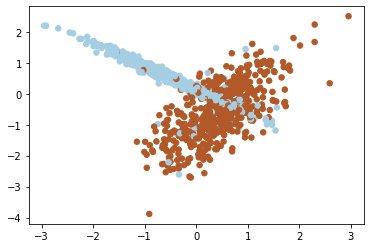

In [8]:
# X, y = make_blobs(n_samples=100, centers=3, random_state=20)
X, y = make_classification(n_samples = 1000, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, n_classes=2)

plt.scatter(X[:,0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

### Make Function to Plot Decision Boundaries
This function just working for `n_features = 2`

In [9]:
def make_plot(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf.fit(X_train, y_train)
    
    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#cfcf1f', '#000000', '#00CC00', '#0000CC']
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])
    cmap_light = ListedColormap(color_list_light[0:numClasses])

    plt.figure(figsize=(9,7))
    
    plt.scatter(X[:,0], X[:, 1], s=30, c=y, cmap=cmap_bold)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.arange(xlim[0], xlim[1], 0.03)
    yy = np.arange(ylim[0], ylim[1], 0.03)

    XX, YY = np.meshgrid(xx, yy)
    xy = np.c_[XX.ravel(), YY.ravel()]

    P = clf.predict(xy).reshape(XX.shape)
    ax.contourf(XX,YY,P, cmap=cmap_light, alpha=0.3);
    
    if numClasses == 2:
        Z = clf.decision_function(xy).reshape(XX.shape)
        ax.contour(XX,YY,Z, colors='k', alpha=0.5, levels=([-1,0,1]), linestyles=['--', '-', '--'])
    else:
        ax.contour(XX,YY,P, colors='k', alpha=0.5, linestyles='--')
    
    accuracy_test = clf.score(X_test, y_test)
    accuracy_train = clf.score(X_train, y_train)
    C = clf.get_params()['C']
    plt.title('Accuracy Test Data: {:.3}     Accuracy Train Data: {:.3} \n C : {}'.format(
        accuracy_test, accuracy_train, C), size=15)

### Make Model

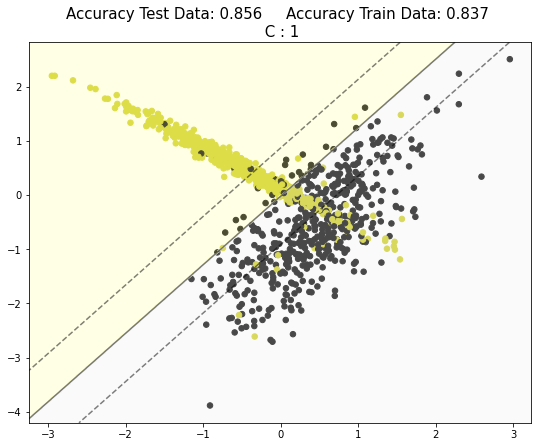

In [10]:
clf = SVC(kernel='linear', C=1)
make_plot(clf, X, y)

## Application to Iris Dataset

### Load Library and Data

In [16]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

data = load_iris(as_frame = True)
X = data.data
y = data.target
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Split Data
Fungsi `train_test_split`, secara default akan membagi data menjadi 75% data training dan 25% data test. Untuk mengaturnya dapat menggunakan argument `test_size` atau `train_size`. Contoh `train_test_split(X, y, train_test = 0.8)`

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  112  | Jumlah Test Data :  38


### Make Model

In [15]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train,y_train)
clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Check Accuracy

In [19]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy)

Accuracy :  0.9736842105263158


### Confusion Matrix

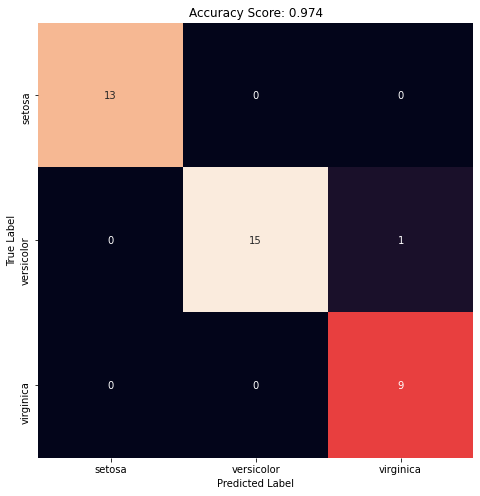

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, square=True, cbar=False, xticklabels=data.target_names, yticklabels=data.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Accuracy Score: {:.3}'.format(accuracy));

#### Make Prediction
Misalnya kita memiliki bunga dengan sepal_length = 0.4, sepal_width = 1, petal_length = 2.3, dan petal_width = 2.5

In [22]:
predict = clf.predict([[0.4,1,2.3,2.5]])
data.target_names[predict][0]

'virginica'